In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\dataset linear regression\USA_Housing.csv')
print(f"The shape of the data is : {data.shape}")
data.head()



The shape of the data is : (5000, 7)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
categorical_cols = []
continious_cols = []
for col in data.columns:
    if data[col].dtypes == 'object':
        categorical_cols.append(col)
    else:
        continious_cols.append(col)

In [7]:
print(f"""Categories : {categorical_cols}

      Continious Data : {continious_cols}""")

Categories : ['Address']

      Continious Data : ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


In [8]:
categorical_cols

['Address']

In [9]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [11]:
data['Avg. Area Income']

0       79545.458574
1       79248.642455
2       61287.067179
3       63345.240046
4       59982.197226
            ...     
4995    60567.944140
4996    78491.275435
4997    63390.686886
4998    68001.331235
4999    65510.581804
Name: Avg. Area Income, Length: 5000, dtype: float64

In [12]:
from sklearn.preprocessing import LabelEncoder
#encoder.fit_transform(data['Avg. Area Income'])
for column in categorical_cols:
    print("*"*50)
    print(f'Encoding for {column}')
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    print(f'Encoding for {column} finished successfully....')
    print("*"*50)

**************************************************
Encoding for Address
Encoding for Address finished successfully....
**************************************************


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 254.0 KB


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# All the features except for price
X = data.drop(['Price'], axis =1)
# Defining the target
y = data['Price']

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((4000, 6), (1000, 6), (4000,), (1000,))

In [18]:
model =  LinearRegression()

In [19]:
# Staring the training :
model.fit(X_train, y_train)

LinearRegression()

In [20]:
predictions = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f" R2 Score {r2_score(predictions, y_test)}")
print(f" mean_squared_error {mean_squared_error(predictions, y_test)}")
print(f" Root mean_squared_error {np.sqrt(mean_squared_error(predictions, y_test))}")
print(f" mean_absolute_error {mean_absolute_error(predictions, y_test)}")

 R2 Score 0.905707864266547
 mean_squared_error 10809311080.212997
 Root mean_squared_error 103967.83675836002
 mean_absolute_error 84440.41978050774


<Axes: ylabel='Price'>

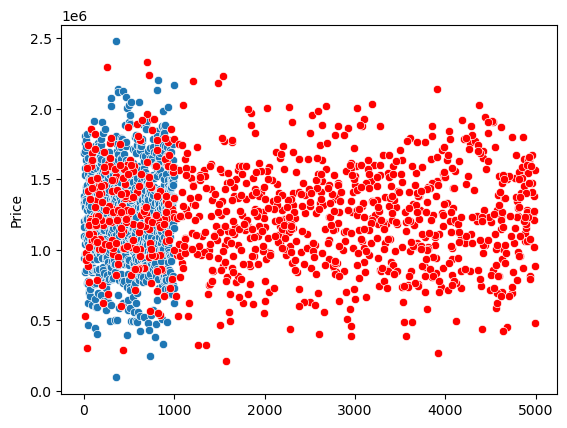

In [22]:
sns.scatterplot(predictions)
sns.scatterplot(y_test, color = 'red')